In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load neighborhood forecast metrics
metrics = pd.read_csv('../reports/metrics/neighborhood_forecast_metrics.csv')

metrics.head()

,neighborhood,mae,rmse
0,Allerton,0.629283,0.727082
1,Alley Pond Park,0.687925,0.852952
2,Annadale-Huguenot-Prince's Bay-Woodrow,0.668993,0.798723
3,Arden Heights-Rossville,0.536837,0.675176
4,Astoria (Central),0.893336,1.108015


In [3]:
print(f"Number of neighborhoods evaluated: {metrics.shape[0]}")

print("\nMAE Summary:")
print(metrics['mae'].describe())

print("\nRMSE Summary:")
print(metrics['rmse'].describe())

Number of neighborhoods evaluated: 190

MAE Summary:
count    190.000000
mean       0.828400
std        0.214300
min        0.301506
25%        0.686114
50%        0.785304
75%        0.964259
max        1.362515
Name: mae, dtype: float64

RMSE Summary:
count    190.000000
mean       1.041531
std        0.278247
min        0.435464
25%        0.841513
50%        1.010727
75%        1.219895
max        1.772986
Name: rmse, dtype: float64


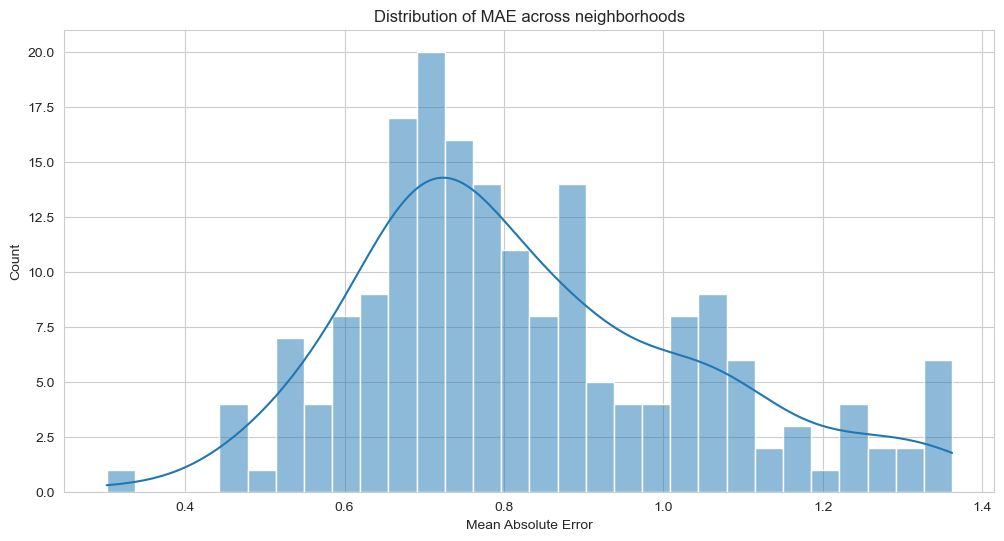

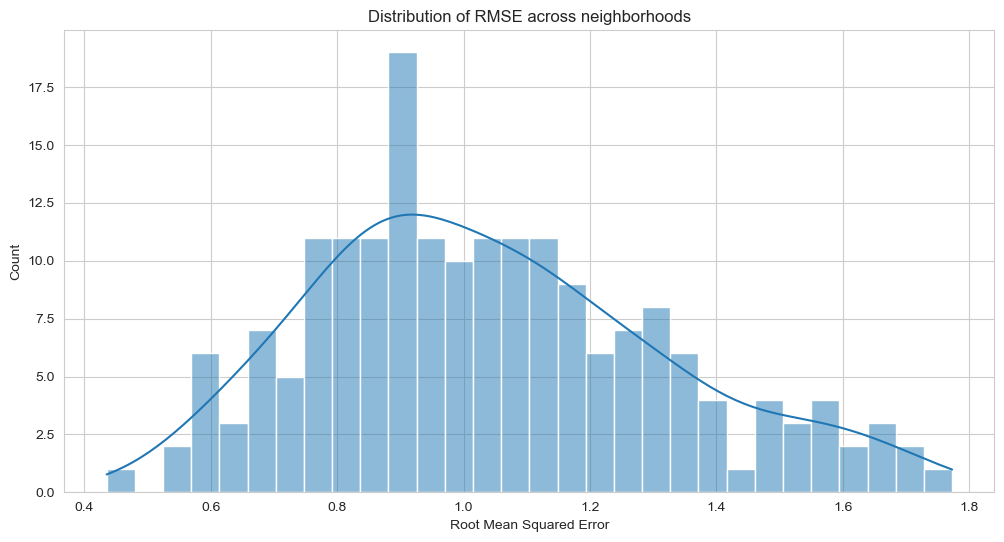

In [4]:
# Histogram of MAE
plt.figure(figsize=(12,6))
sns.histplot(metrics['mae'], bins=30, kde=True)
plt.title('Distribution of MAE across neighborhoods')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Count')
plt.show()

# Histogram of RMSE
plt.figure(figsize=(12,6))
sns.histplot(metrics['rmse'], bins=30, kde=True)
plt.title('Distribution of RMSE across neighborhoods')
plt.xlabel('Root Mean Squared Error')
plt.ylabel('Count')
plt.show()

In [5]:
# Best performing neighborhoods
best_neighborhoods = metrics.sort_values('mae').head(10)
print("\nTop 10 Best Neighborhoods by MAE:")
print(best_neighborhoods[['neighborhood', 'mae', 'rmse']])

# Worst performing neighborhoods
worst_neighborhoods = metrics.sort_values('mae', ascending=False).head(10)
print("\nTop 10 Worst Neighborhoods by MAE:")
print(worst_neighborhoods[['neighborhood', 'mae', 'rmse']])



Top 10 Best Neighborhoods by MAE:
                                       neighborhood       mae      rmse
135                                   Prospect Park  0.301506  0.435464
66                                      Forest Park  0.452656  0.612163
11                            Bay Terrace-Clearview  0.453645  0.556954
85   Highland Park-Cypress Hills Cemeteries (North)  0.457358  0.562145
28                                     Central Park  0.465439  0.570004
84                                  Highbridge Park  0.511231  0.597874
175                              Van Cortlandt Park  0.521397  0.627312
187                     Windsor Terrace-South Slope  0.526164  0.591801
128                                     Parkchester  0.526305  0.604040
3                           Arden Heights-Rossville  0.536837  0.675176

Top 10 Worst Neighborhoods by MAE:
                  neighborhood       mae      rmse
55           East Williamsburg  1.362515  1.772986
113     Mott Haven-Port Morris  1.3

Next we are creating a new file that gives the confidence level of the forecast for each neighborhood

In [7]:
import pandas as pd
from pathlib import Path

# Load metrics
metrics = pd.read_csv('../reports/metrics/neighborhood_forecast_metrics.csv')

# Load full list of neighborhoods
daily_nbhd = pd.read_parquet('../data/processed/daily_neighborhood_crashes.parquet')
all_neighborhoods = daily_nbhd['neighborhood'].unique()

# Create full dataframe
confidence_df = pd.DataFrame({'neighborhood': all_neighborhoods})

# Merge in the metrics (left join to preserve all neighborhoods)
confidence_df = confidence_df.merge(metrics[['neighborhood', 'rmse']], on='neighborhood', how='left')

# Assign confidence levels
def assign_confidence(row):
    if pd.isna(row['rmse']):
        return 'Low Confidence'
    elif row['rmse'] <= 2:
        return 'High Confidence'
    else:
        return 'Low Confidence'

confidence_df['forecast_confidence'] = confidence_df.apply(assign_confidence, axis=1)

# Drop RMSE column if you don't want it visible
confidence_df = confidence_df[['neighborhood', 'forecast_confidence']]

# Save to processed data
Path('data/processed').mkdir(parents=True, exist_ok=True)
confidence_df.to_csv('../data/processed/neighborhood_forecast_confidence.csv', index=False)

print("Saved annotated confidence dataset to data/processed/neighborhood_forecast_confidence.csv")


Saved annotated confidence dataset to data/processed/neighborhood_forecast_confidence.csv
